In [1]:
import pygmt
import numpy as np
import pandas as pd
import json

In [7]:
# Plotting earth relief
grid = '@earth_relief_30s'

In [9]:
# Get station data from station_list.json
station_names = []
network = []
channels = []

station_lats = []
station_lons = []
elev = []

with open('station_list.json') as infile:
    stations = json.load(infile)
    
    for i in stations:
        station_names.append(i)
    
    for i in station_names:
        network.append(stations[i]['network'])
        channels.append(stations[i]['channels'])
        station_lats.append(stations[i]['coords'][0])
        station_lons.append(stations[i]['coords'][1])
        elev.append(stations[i]['coords'][2])


station_data = {
    'stations': station_names,
    'lat': station_lats,
    'lon': station_lons
}

station_df = pd.DataFrame(station_data)

In [10]:
# Get earthquake locations
num_of_sec = []
lat = []
lon = []
depth = []
mag = []
ev_id = []

with open('events_locations_hectormine.txt', 'r') as f:
    for line in f:
        split_line = line.split()
        num_of_sec.append(split_line[0])
        lat_split = float(split_line[1])
        lat.append(lat_split)
        lon_split = float(split_line[2])
        lon.append(lon_split)
        depth_split = float(split_line[3])
        depth.append(depth_split)
        mag_split = float(split_line[4])
        mag.append(mag_split)
        ev_id.append(split_line[5])

lat_arr = np.array(lat)
lon_arr = np.array(lon)
depth_arr = np.array(depth)
mag_arr = np.array(mag)
        
# Set region of the plot
region = [lon_arr.min() - 1, lon_arr.max() + 1, lat_arr.min() - 1, lat_arr.max() + 1]  

In [38]:
# Cities near Hector Mine
nearby_cities_lat = np.array([34.5388, 34.895798, 34.42741, 34.114174])
nearby_cities_lon = np.array([-117.298195, -117.017281, -117.31484, -116.432236])
nearby_cities_names = np.array(['Victorville', 'Barstow', 'Hesperia', 'Yucca Valley'])

In [11]:
# Custom color palette
mapcpt = 'map_gray.cpt'

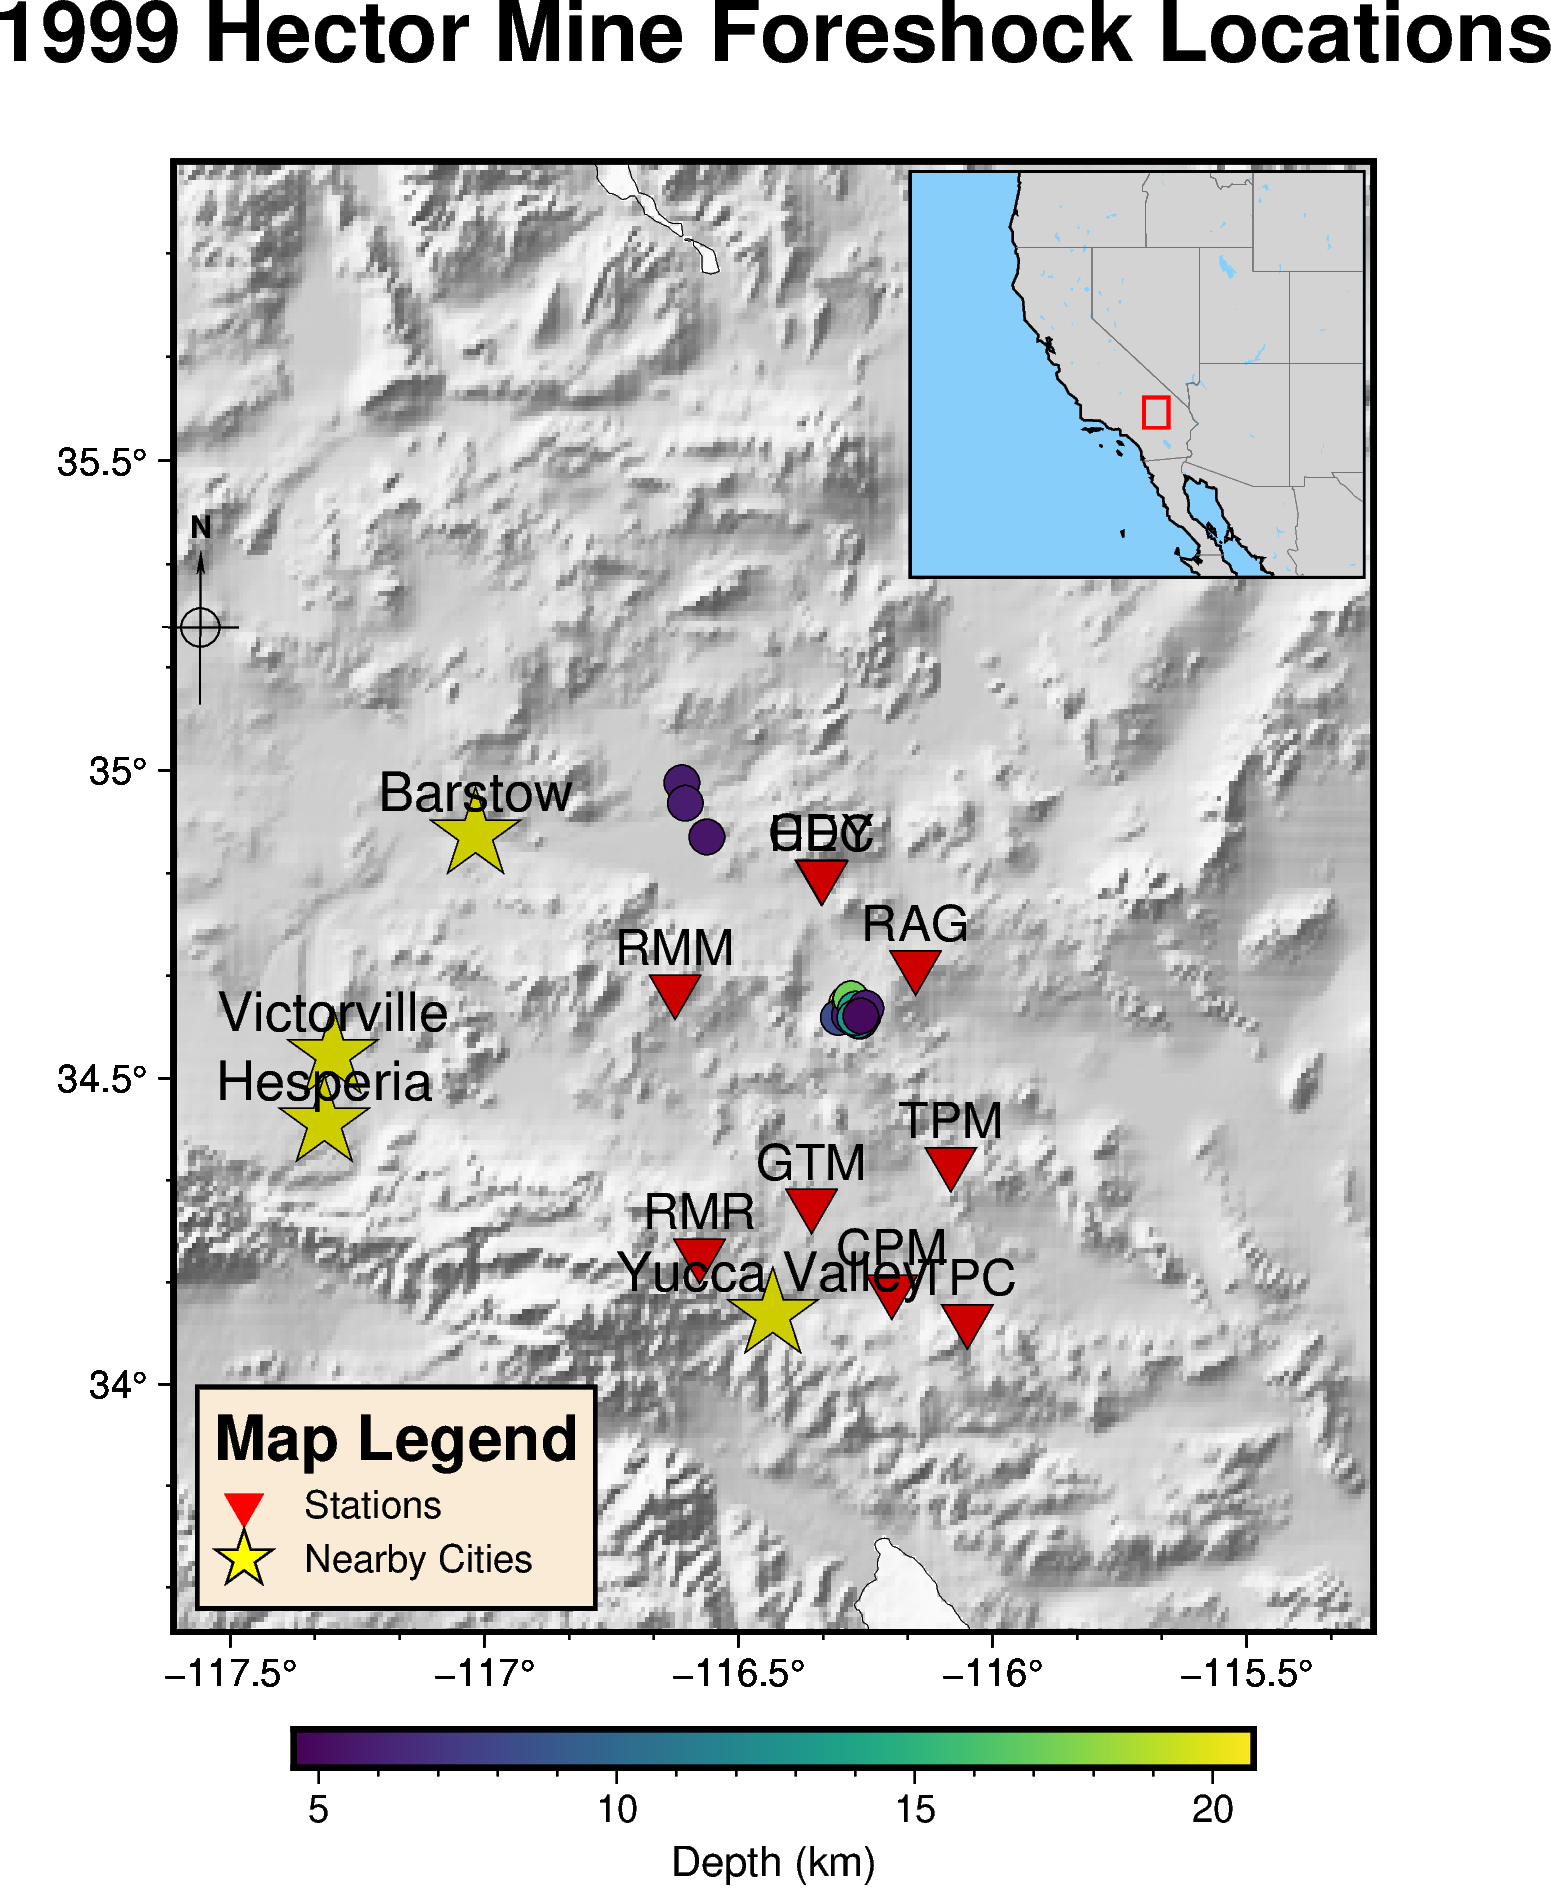

In [39]:
fig = pygmt.Figure()

pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
pygmt.config(FORMAT_GEO_MAP='D');
pygmt.config(FONT_LABEL='10p,Helvetica,black');

subset_region = [lon_arr.min() - 0.5, lon_arr.max() + 0.5, lat_arr.min() - 0.5, lat_arr.max() + 0.5]

fig.basemap(region=region, projection='M4i', frame=['a', '+t1999 Hector Mine Foreshock Locations'])

fig.grdimage(
    grid=grid,
    cmap=mapcpt,
    region=region,
    projection='M4i',
    shading=True,
    frame=True
    )

fig.grdcontour(
    grid=grid,
    interval=4000,
    annotation="4000+f6p",
    limit="-8000/0",
    pen="a0.15p"
    )

fig.coast(water='lightskyblue')

pygmt.makecpt(cmap='viridis', series=[depth_arr.min(), depth_arr.max()])

# Plot earthquakes
fig.plot(x=lon_arr, 
         y=lat_arr,
         color=depth_arr,
         cmap=True,
         style="c0.3c",  
         pen="black",
         frame='a',)

scale = "f-117.2/33.8/20/50+u+lScale:"


with pygmt.config(FONT_TITLE=10):
    fig.basemap(rose="jTL+w1.3c+lO,E,S,N+o-0.1c/3c", 
                map_scale=scale,) 

# Plot stations
fig.plot(x=station_df.lon, 
         y=station_df.lat,
         label='Stations',
         style='i0.5c', 
         color='red3', 
         pen='black')

fig.text(x=station_df.lon, y=station_df.lat + 0.07, text=station_df.stations, font='12p')

# Plot nearby cities
fig.plot(x=nearby_cities_lon, 
         y=nearby_cities_lat, 
         label='Nearby Cities',
         style='a0.8c', 
         color='yellow3', 
         pen='black')

fig.text(x=nearby_cities_lon, y=nearby_cities_lat + 0.07, text=nearby_cities_names, font="13p")

fig.colorbar(frame='af+l"Depth (km)"')

# Add inset
with fig.inset(position="jTR+o0.1c", 
               box="+p1.5p,black", 
               region=[-130, -105, 27, 45],
               projection='M1.5i'):
    
    fig.coast(region=[-130, -105, 27, 45],
              projection='M1.5i',
              land="lightgray", 
              water="lightskyblue", 
              borders="a/faint,117/117/117", 
              shorelines="1/0.5p",
              )
    
    rectangle = [[subset_region[0], subset_region[2], subset_region[1], subset_region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="0.8p,red")
             
fig.legend(region=region, 
           projection="M4i", 
           spec='legend_file.txt', 
           position="jBL+o0.2c",
           box="+gantiquewhite+pthick,black")
        
fig.show()

In [ ]:
fig.savefig('hypoinverse_to_pygmt.png')